In [1]:
import sys

sys.path.append("../../src")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sto_ng
import pandas as pd

importlib.reload(sto_ng)
from sto_ng import *

In [3]:
a = 1
b = 2
M = 3
exps = [a * b ** (i - M + 1) for i in range(M)]
a = BasisFunction(1, exps, [[1 / M for _ in range(M)]])
result_1 = optimize_sto_ng(a)
exps_1, coefs_1 = params2expscoefs(1, result_1.x)
df = pd.DataFrame({"exps_1": exps_1, "coefs_1s": coefs_1[0]})
a = 1
b = 2
M = 3
exps = [a * b ** (i - M + 1) for i in range(M)]
a = BasisFunction(2, exps, [[1 / M for _ in range(M)] for _ in range(2)])
result_2 = optimize_sto_ng(a)
exps_2, coefs_2 = params2expscoefs(2, result_2.x)
df["exps_2"] = exps_2
df["coefs_2s"] = coefs_2[0]
df["coefs_2p"] = coefs_2[1]
df.to_csv("sto_3g.csv", index=False)

In [4]:
r = np.linspace(0.0, 5, 100)
phi_1s_base = sto_ng.BasisFunction(
    1, df["exps_1"].to_list(), [df["coefs_1s"].to_list()]
)
phi_2s_base = sto_ng.BasisFunction(
    1, df["exps_2"].to_list(), [df["coefs_2s"].to_list()]
)
phi_2p_base = sto_ng.BasisFunction(
    2,
    df["exps_2"].to_list(),
    [0, df["coefs_2p"].to_list()],
)

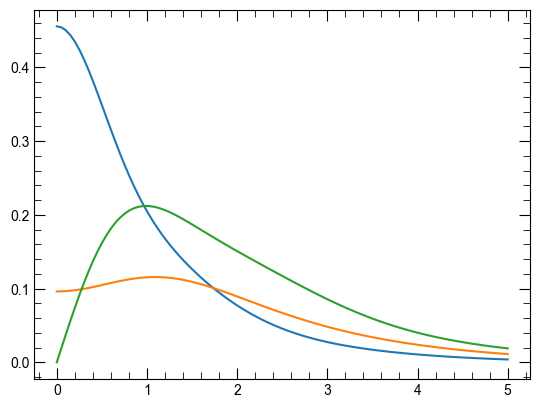

In [5]:
fig, ax = plt.subplots()
ax.plot(r, sto_ng.sto_ng_s(phi_1s_base, r))
ax.plot(r, sto_ng.sto_ng_s(phi_2s_base, r))
ax.plot(r, sto_ng.sto_ng_p(phi_2p_base, r))
plt.show()